# About

The purpose of this document is to create a Dataverse API testing notebook. These tests are being run against Dataverse v5.13.

See [_about_dataverseTest.md](./_about_dataverseTest.md) for information about configuring and running this notebook, and the technical details about the notebook (since we didn't want to bog down the notebook with instructions if you know Python).

## Create a Dataverse Collection

### Configuration

Using the Dataverse starter object `DATAVERSE_COLLECTION_START` in our configuration file we will create a new collection through the API https://guides.dataverse.org/en/5.13/api/native-api.html#create-a-dataverse-collection. Luckily we do not need to follow the API documentation that instructs users to create a separate JSON file for use with the API endpoint. Since we added the JSON to our main configuration file we can simply reference the object in the `json` parameter of our request. We will place this collection under the root 'parent' collection.

### Retrieving our collection info

Since we already have our starter collection information defined in our main `_config_dataverseTest.json` file, there is no need to save the collection information sent back from the creation of our collection. We can always use the `ViewCollection()` method in our worker script to retrieve the collection information as long as we at least know our collection alias. 

### Issue

Note: If you use a GET request instead of a POST request to the API endpoint, the action may appear to be successful but it will simply be returning the Dataverse collection of the main parent collection, and NOT create a new collection for you.

In [92]:
# run the _installer_dataverseTest.py script and import our _worker_modTest.py script
import _installer_dataverseTest
%load_ext autoreload
%autoreload all
from _worker_dataverseTest import Worker
# we need the 'autoreload' above if we are actively making changes to the worker.py module and want to reload any changes to the module without restarting the notebook kernel
# NOTE: if we make changes to the worker script or configuration we need to rerun this code block for the notebook to use the new edits
objWorker = Worker("_config_dataverseTest.json") # initialize our Worker object; we should only need to call this once for the notebook session (working with 'demo' configuration)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Finished ObjDvApi init
Finished installing and importing modules for the _config_dataverseTest.json environment


## About the notebook code

The code blocks in this notebook are intentionally brief because most users are not concerned with what the code looks like (at least initially). If you want to know what the scripts do then review the .py files that we imported into this notebook. However we will briefly describe a line of code so you have a general idea of what is happening behind the scenes.

The `objWorker.ObjDvApi.DvCreateCollection()` command for example, runs the `DvCreateCollection()` method, which is found in the `ObjDvApi` object, and makes a Dataverse API request to create a new repository/collection. The `ObjDvApi` is simply defined in an external Python file which contains reusable methods for working with the Dataverse API. We use this same class for all of our datasets, so keeping the methods in a single file for reuse is better than manually adding into the code of each of our datasets and making our working code script more densely worded than it needs to be.

### The objWorker

The `objWorker` is the object that we customize for each dataset and simply acts as a template for importing different classes/objects we want to attach to it. For instance, we attach the `ObjDvApi` to our `objWorker` object so whatever functionality exists in the `ObjDvApi` class can be used in our `objWorker` class. The `.` between `objWorker.ObjDvApi` simply represents that `ObjDvApi` is an extension of `objWorker`. An analogy would be adding a dustpan to a broom (or `broom.dustpan`) to extend the functionality of the broom, so the broom can now be used to pick up dust and not simply push it around.

Below are some simple code commands to set up a Dataverse collection.

In [ ]:
objWorker.ObjDvApi.createCollection()  # initialize a new collection

In [ ]:
objWorker.ObjDvApi.viewCollection()  # view information on our dataverse collection

In [ ]:
# objWorker.ObjDvApi.deleteCollection()  # delete our dataverse collection

In [ ]:
objWorker.ObjDvApi.viewCollectionContents()  # view dataverse collection contents

## Create a dataset

Using the https://guides.dataverse.org/en/5.13/_downloads/4e04c8120d51efab20e480c6427f139c/dataset-create-new-all-default-fields.json referenced in https://guides.dataverse.org/en/5.13/api/native-api.html#create-a-dataset-in-a-dataverse-collection, will be our dataset template. We simply add this JSON object to our `_config_dataverseTest.json` file under the `DATAVERSE_DATASET` constant.


In [ ]:
objWorker.createDataset()  # create a partial dataset
# NOTE: we need the JSON object of the full dataset initialization (waiting from RDMC)

In [ ]:
objWorker.deleteDataset()  # delete dataset draft

## Create fake data

Next we need to create some files to test the API.

In [93]:
objWorker.createTestFiles()

start createTestFiles
end createTestFiles


## Adding files to the dataset

As of Dataverse v5.13, there is not documented way to replace a file in a dataset draft with another file with the same name. All I have found to do is (delete the draft and import the new files?).




We will assume this notebook is only used to work with a single dataset, thus we do not need to save the dataset persistentId to our JSON config.

When we attempt to upload a file to the dataset, it is advisable to check the MD5 hash of the file you are attempting to upload and any file that already exists with the same name in the dataset. If the MD5 hash is the same and you upload the file to the dataset, then a new file will be added to the dataset with a file name ending in a number. Thus you will end up with two duplicate files in the dataset with two different names (which you should not do). We have added an MD5 hash checking method to our `ObjDvApi` class that will check for matching MD5 hashes and will use the `file replace` API if files already exist in the dataset.

**Note: uploading new files (different MD5 hashes) to a dataset draft with existing files of the same names will result in duplicate files being added, so we need to use the `file replace` API instead for existing files.**

## Replace files

...we need to factor this into the adding files so that newer files with existing files uses the replace function instead of adding a duplicate file.

Original file list
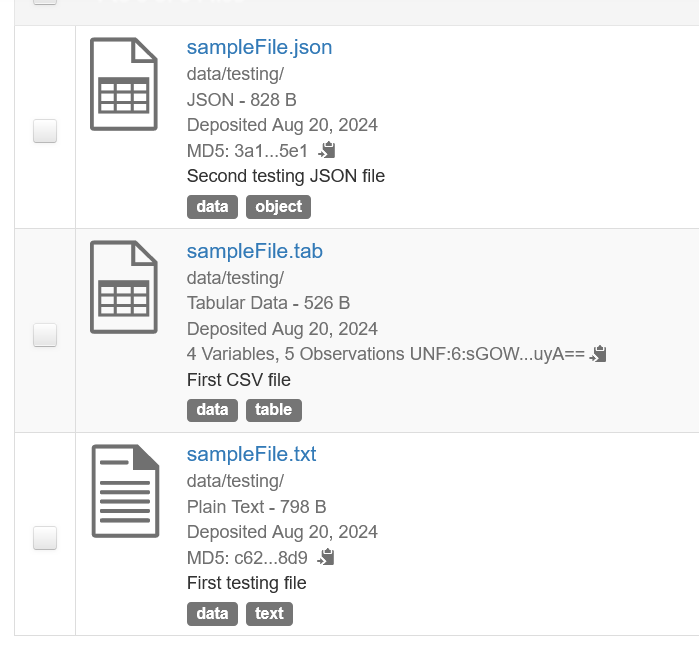

Replacement file list
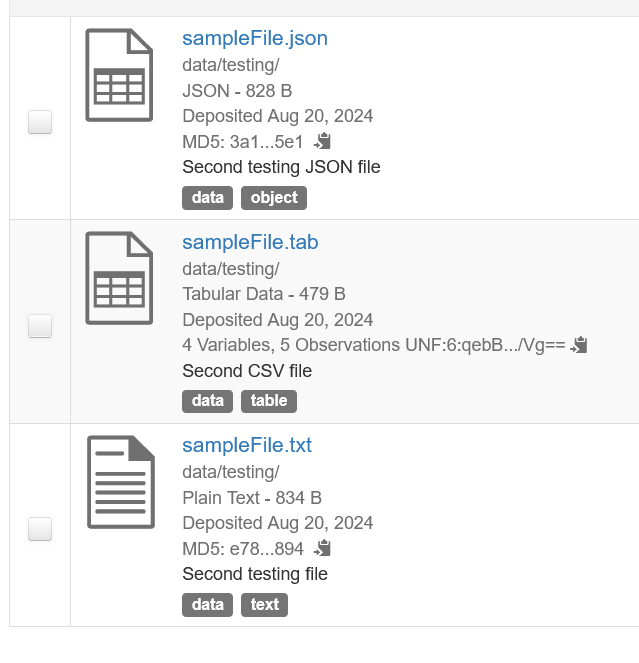

In [94]:
objWorker.uploadTestFiles()

start uploadTestFiles
Something has changed with the file so we can upload a new version of the file to the Dataverse e7898ae7c51ba9b67b5828abfce88894 == c6202db0fb9184a8bcfd8a51ed77c8d9
{'description': 'First testing file', 'label': 'sampleFile.txt', 'restricted': False, 'directoryLabel': 'data/testing', 'version': 1, 'datasetVersionId': 141, 'categories': ['data', 'text'], 'dataFile': {'id': 415, 'persistentId': '', 'pidURL': '', 'filename': 'sampleFile.txt', 'contentType': 'text/plain', 'filesize': 798, 'description': 'First testing file', 'categories': ['data', 'text'], 'storageIdentifier': 's3://dataverse-demo:19170660ab4-058c4c5c597e', 'rootDataFileId': -1, 'md5': 'c6202db0fb9184a8bcfd8a51ed77c8d9', 'checksum': {'type': 'MD5', 'value': 'c6202db0fb9184a8bcfd8a51ed77c8d9'}, 'creationDate': '2024-08-20'}, 'blnFileExists': True, 'blnAddNew': True}
making request: https://demo-dataverse.rdmc.unc.edu/api/files/415/replace
----------------------------------------
json= {'status': 'OK', 

## Publish dataset

...

## Issue UNCDVSUP-38 (submitted on 8/17)

I’m trying to use the JSON from https://guides.dataverse.org/en/5.13/_downloads/4e04c8120d51efab20e480c6427f139c/dataset-create-new-all-default-fields.json to create a new dataset in http://demo-dataverse.rdmc.unc.edu .  However I am receiving an error that makes it seem that the JSON properties are incorrectly defined. Below is the response information (with the error message appearing in https://github.com/IQSS/dataverse.harvard.edu/issues/172 ):

json= {'status': 'ERROR', 'message': 'Error parsing Json: incorrect multiple   for field productionPlace'}
headers= {'Date': 'Sat, 17 Aug 2024 16:09:07 GMT', 'Server': 'Apache/2.4.37 (Rocky Linux) OpenSSL/1.1.1k', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'PUT, GET, POST, DELETE, OPTIONS', 'Access-Control-Allow-Headers': 'Accept, Content-Type, X-Dataverse-Key, Range', 'Access-Control-Expose-Headers': 'Accept-Ranges, Content-Range, Content-Encoding', 'Content-Type': 'application/json;charset=UTF-8', 'Content-Length': '97', 'Connection': 'close'}
response status= 400

The JSON in question seems to be:

{
              "typeName": "productionPlace",
              "multiple": false,
              "typeClass": "primitive",
              "value": "ProductionPlace"
            },

The release notes for 5.13 state: 

Edit the following line to your schema.xml (to indicate that productionPlace is now multiValued='true"):

So I can’t tell if the UNC Dataverse schema simply needs updating or something else is going on. If I set "multiple": true, in the JSON then the response is:

json= {'status': 'ERROR', 'message': 'Error parsing Json: Invalid values submitted for productionPlace. It should be an array of values.'}

…but I do not know how to format the JSON for multiple values.

My Python method for creating the dataset is using POST so that should not be the issue.

def DvCreateDataset(self):
        print("start DvCreateDataset")
        strApiEndpoint = '%s/api/dataverses/%s/datasets' % (self.strDATAVERSE_DOMAIN, self._config["DATAVERSE_COLLECTION_START"]["alias"])
        print('making request: %s' % strApiEndpoint)
        objHeaders = {
            "Content-Type": "application/json",
            "X-Dataverse-Key": self.strDATAVERSE_API_TOKEN
        }
        r = requests.request("POST", strApiEndpoint, json=self._config["DATAVERSE_DATASET"], headers=objHeaders)
        self.printResponseInfo(r)
        print("end DvCreateDataset")